### Source: https://www.redfin.com/news/data-center/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
#df = pd.read_csv("zip_code_market_tracker.tsv000",sep='\t')
#wa_ = df.loc[df['state_code']=='WA'].sort_values(by='period_begin')
#wa_.to_csv('wa.csv',index=False)

In [3]:
wa_ = pd.read_csv("wa.csv")

In [4]:
drop = ['period_duration','region_type','region_type_id','table_id',
        'is_seasonally_adjusted','state','state_code','property_type_id',
        'months_of_supply','months_of_supply_mom','months_of_supply_yoy',
        'price_drops','price_drops_mom','price_drops_yoy','parent_metro_region',
        'parent_metro_region_metro_code','last_updated']

In [5]:
wa =wa_.drop(columns=drop)
wa.head()

,period_begin,period_end,region,city,property_type,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy
0,2012-01-01,2012-03-31,Zip Code: 98555,NaN,Single Family Residential,217000.0,-0.397222,NaN,223000.0,0.000000,NaN,130.634274,-0.391462,NaN,259.661836,0.788523,NaN,2.0,1.000000,NaN,NaN,NaN,NaN,5.0,0.666667,NaN,12.0,0.090909,NaN,81.0,11.0,NaN,0.960866,0.025801,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
1,2012-01-01,2012-03-31,Zip Code: 98232,NaN,Single Family Residential,177350.0,-0.372212,-0.355091,489450.0,0.151783,0.054850,108.294325,-0.268090,-0.404252,271.135109,0.089977,0.389647,6.0,0.000000,0.500000,NaN,NaN,NaN,10.0,0.428571,0.000000,19.0,0.117647,0.000000,121.0,28.0,-24.0,0.984049,0.013911,0.058126,0.500000,0.166667,0.500000,NaN,NaN,NaN
2,2012-01-01,2012-03-31,Zip Code: 98373,NaN,Multi-Family (2-4 Unit),227400.0,0.000000,-0.088577,200000.0,-0.159222,-0.230621,73.592233,-0.182947,-0.289685,97.222222,0.068632,-0.042957,1.0,-0.666667,-0.500000,NaN,NaN,NaN,7.0,2.500000,0.400000,6.0,5.000000,-0.454545,218.0,81.0,156.0,1.088038,0.076236,0.108772,1.000000,0.666667,1.000000,NaN,NaN,NaN
3,2012-01-01,2012-03-31,Zip Code: 98531,NaN,Single Family Residential,135000.0,0.125000,0.115702,125000.0,0.092180,-0.100719,68.460192,-0.076622,0.020370,89.413519,0.022212,-0.051439,41.0,-0.023810,0.078947,11.0,0.1,-0.083333,57.0,-0.017241,-0.197183,101.0,-0.056075,-0.251852,101.0,19.0,-33.5,0.959505,0.000140,0.005062,0.243902,-0.018002,0.138639,0.090909,-0.109091,-0.075758
4,2012-01-01,2012-03-31,Zip Code: 98546,NaN,All Residential,205000.0,0.145251,0.346470,207500.0,0.169014,-0.306020,145.859473,0.433937,0.535725,206.213307,0.896133,0.429459,7.0,0.000000,2.500000,4.0,NaN,3.000000,12.0,1.000000,0.090909,18.0,-0.100000,0.000000,130.0,-20.5,30.5,0.974005,0.010210,0.012811,0.142857,0.000000,0.142857,0.500000,NaN,0.500000


In [6]:
wa['period_begin'] = pd.to_datetime(wa['period_begin'])
wa['period_end'] = pd.to_datetime(wa['period_end'])
wa['year_begin'] = wa['period_begin'].dt.year 
wa['year_end'] = wa['period_end'].dt.year

In [7]:
(wa['year_begin']== wa['year_end']).value_counts()

True     165501
False     31348
Name: count, dtype: int64

In [8]:
des = ['Zip Code: 98023','Zip Code: 98148','Zip Code: 98198']
kent = ['Zip Code: 98030','Zip Code: 98031','Zip Code: 98032','Zip Code: 98035','Zip Code: 98042','Zip Code: 98055','Zip Code: 98064','Zip Code: 98089']
renton = ['Zip Code: 98055','Zip Code: 98056','Zip Code: 98057','Zip Code: 98058','Zip Code: 98059','Zip Code: 98178']
auburn = ['Zip Code: 98001','Zip Code: 98002','Zip Code: 98030','Zip Code: 98071','Zip Code: 98092']
fed = ['Zip Code: 98001','Zip Code: 98003','Zip Code: 98023','Zip Code: 98063','Zip Code: 98093']

In [9]:
combined = [item for sublist in [des, kent, renton, auburn, fed] for item in sublist]

In [10]:
data = wa.loc[wa['region'].isin(combined)]
data.head()

,period_begin,period_end,region,city,property_type,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,year_begin,year_end
8,2012-01-01,2012-03-31,Zip Code: 98001,NaN,Condo/Co-op,122325.0,NaN,0.112045,100000.0,NaN,NaN,80.956320,NaN,-0.006445,84.745763,NaN,NaN,1.0,NaN,0.00,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,1.000000,154.0,NaN,70.0,0.816044,NaN,0.021763,0.000000,NaN,0.000000,NaN,NaN,NaN,2012,2012
66,2012-01-01,2012-03-31,Zip Code: 98003,NaN,Single Family Residential,178000.0,0.005650,-0.147305,185000.0,0.057149,-0.118838,103.375748,-0.049928,-0.108453,106.095234,0.026728,-0.091720,52.0,0.061224,0.04,23.0,0.642857,1.090909,74.0,0.213115,-0.139535,75.0,-0.062500,-0.414062,53.5,12.5,-33.5,0.984019,0.003391,0.001430,0.288462,0.104788,0.028462,0.304348,0.090062,0.213439,2012,2012
74,2012-01-01,2012-03-31,Zip Code: 98148,NaN,Single Family Residential,244975.0,0.333197,0.234131,224950.0,0.153590,-0.000222,115.774518,-0.049533,-0.068168,116.134752,0.012457,-0.067531,14.0,-0.222222,0.40,6.0,NaN,2.000000,13.0,0.444444,-0.551724,12.0,-0.142857,-0.600000,158.5,74.5,116.5,0.964028,-0.021178,0.009785,0.000000,-0.222222,-0.200000,0.500000,NaN,0.500000,2012,2012
79,2012-01-01,2012-03-31,Zip Code: 98056,NaN,Multi-Family (2-4 Unit),165000.0,NaN,-0.246575,287500.0,NaN,0.513955,103.204365,NaN,-0.255780,112.695925,NaN,0.038262,2.0,NaN,0.00,NaN,NaN,NaN,2.0,NaN,-0.333333,3.0,NaN,-0.571429,225.0,NaN,77.0,0.940379,NaN,0.035443,0.000000,NaN,-0.500000,NaN,NaN,NaN,2012,2012
83,2012-01-01,2012-03-31,Zip Code: 98198,NaN,Condo/Co-op,124200.0,0.052542,-0.193506,99000.0,-0.004525,-0.099386,110.089910,-0.001256,-0.249182,107.915512,-0.025947,0.045189,17.0,-0.260870,0.70,9.0,0.285714,0.000000,38.0,0.117647,-0.095238,43.0,-0.140000,-0.376812,81.0,-29.0,23.5,0.975270,0.016221,-0.000243,0.117647,0.030691,0.117647,0.333333,0.047619,0.333333,2012,2012


In [11]:
# Combine zip code lists into a single dictionary using a dictionary comprehension
zip_to_city = {zip_code: city for city, zip_codes in {
    'Des Moines': des,
    'Kent': kent,
    'Renton': renton,
    'Auburn': auburn,
    'Federal Way': fed
}.items() for zip_code in zip_codes}

# Define a function to assign city based on region
def assign_city(region):
    return zip_to_city.get(region, 'Unknown')

# Apply the function to the 'region' column to create a new 'city' column
data['city'] = data['region'].apply(assign_city)

data.head()

/var/folders/78/pdprqpw91z18xvt6zrk553800000gn/T/ipykernel_15467/4095816758.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city'] = data['region'].apply(assign_city)


,period_begin,period_end,region,city,property_type,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,year_begin,year_end
8,2012-01-01,2012-03-31,Zip Code: 98001,Federal Way,Condo/Co-op,122325.0,NaN,0.112045,100000.0,NaN,NaN,80.956320,NaN,-0.006445,84.745763,NaN,NaN,1.0,NaN,0.00,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,1.000000,154.0,NaN,70.0,0.816044,NaN,0.021763,0.000000,NaN,0.000000,NaN,NaN,NaN,2012,2012
66,2012-01-01,2012-03-31,Zip Code: 98003,Federal Way,Single Family Residential,178000.0,0.005650,-0.147305,185000.0,0.057149,-0.118838,103.375748,-0.049928,-0.108453,106.095234,0.026728,-0.091720,52.0,0.061224,0.04,23.0,0.642857,1.090909,74.0,0.213115,-0.139535,75.0,-0.062500,-0.414062,53.5,12.5,-33.5,0.984019,0.003391,0.001430,0.288462,0.104788,0.028462,0.304348,0.090062,0.213439,2012,2012
74,2012-01-01,2012-03-31,Zip Code: 98148,Des Moines,Single Family Residential,244975.0,0.333197,0.234131,224950.0,0.153590,-0.000222,115.774518,-0.049533,-0.068168,116.134752,0.012457,-0.067531,14.0,-0.222222,0.40,6.0,NaN,2.000000,13.0,0.444444,-0.551724,12.0,-0.142857,-0.600000,158.5,74.5,116.5,0.964028,-0.021178,0.009785,0.000000,-0.222222,-0.200000,0.500000,NaN,0.500000,2012,2012
79,2012-01-01,2012-03-31,Zip Code: 98056,Renton,Multi-Family (2-4 Unit),165000.0,NaN,-0.246575,287500.0,NaN,0.513955,103.204365,NaN,-0.255780,112.695925,NaN,0.038262,2.0,NaN,0.00,NaN,NaN,NaN,2.0,NaN,-0.333333,3.0,NaN,-0.571429,225.0,NaN,77.0,0.940379,NaN,0.035443,0.000000,NaN,-0.500000,NaN,NaN,NaN,2012,2012
83,2012-01-01,2012-03-31,Zip Code: 98198,Des Moines,Condo/Co-op,124200.0,0.052542,-0.193506,99000.0,-0.004525,-0.099386,110.089910,-0.001256,-0.249182,107.915512,-0.025947,0.045189,17.0,-0.260870,0.70,9.0,0.285714,0.000000,38.0,0.117647,-0.095238,43.0,-0.140000,-0.376812,81.0,-29.0,23.5,0.975270,0.016221,-0.000243,0.117647,0.030691,0.117647,0.333333,0.047619,0.333333,2012,2012


In [12]:
pd.set_option('display.max_rows', None)
avg_price = data[['city','region','property_type','median_sale_price','median_list_price','median_ppsf']].groupby(['city','region','property_type']).mean().round(2)     
avg_price

median_sale_price  \
city        region          property_type                                  
Auburn      Zip Code: 98002 All Residential                    317661.62   
                            Condo/Co-op                        167078.92   
                            Multi-Family (2-4 Unit)            465808.17   
                            Single Family Residential          334577.63   
                            Townhouse                          259070.25   
            Zip Code: 98030 All Residential                    406107.14   
                            Condo/Co-op                        176512.70   
                            Multi-Family (2-4 Unit)            561181.78   
                            Single Family Residential          445886.69   
                            Townhouse                          264183.99   
            Zip Code: 98071 All Residential                    273292.74   
                            Multi-Family (2-4 Unit)            408333.33   
                            Single Family Residential          244483.65   
            Zip Code: 98092 All Residential                    435617.49   
                            Condo/Co-op                        247239.35   
                            Multi-Family (2-4 Unit)            405523.67   
                            Single Family Residential          465761.10   
                            Townhouse                          312398.16   
Des Moines  Zip Code: 98148 All Residential                    411303.11   
                            Condo/Co-op                        164924.69   
                            Multi-Family (2-4 Unit)            511557.14   
                            Single Family Residential          444939.96   
                            Townhouse                          431622.10   
            Zip Code: 98198 All Residential                    374520.28   
                            Condo/Co-op                        239768.23   
                            Multi-Family (2-4 Unit)            573293.21   
                            Single Family Residential          405148.52   
                            Townhouse                          281955.92   
Federal Way Zip Code: 98001 All Residential                    413293.10   
                            Condo/Co-op                        289369.66   
                            Multi-Family (2-4 Unit)            408591.35   
                            Single Family Residential          417930.29   
                            Townhouse                          299271.83   
            Zip Code: 98003 All Residential                    345538.34   
                            Condo/Co-op                        167887.83   
                            Multi-Family (2-4 Unit)            500005.23   
                            Single Family Residential          398134.48   
                            Townhouse                          232973.50   
            Zip Code: 98023 All Residential                    389506.01   
                            Condo/Co-op                        193203.45   
                            Multi-Family (2-4 Unit)            185000.00   
                            Single Family Residential          406218.38   
                            Townhouse                          234007.12   
            Zip Code: 98063 All Residential                    551130.00   
                            Single Family Residential          551130.00   
Kent        Zip Code: 98031 All Residential                    431536.21   
                            Condo/Co-op                        205456.56   
                            Multi-Family (2-4 Unit)            462485.19   
                            Single Family Residential          446159.17   
                            Townhouse                          312372.24   
            Zip Code: 98032 All Residential                    332621.67   
                           

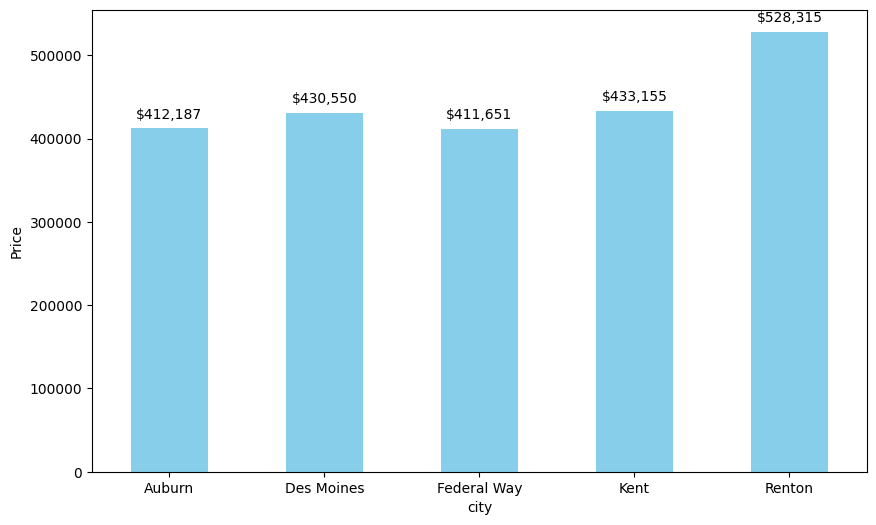

In [13]:
# Review Single Family Residential

single_family= data.loc[data['property_type']== 'Single Family Residential']
ax = single_family[['city','median_list_price']].groupby('city').mean().plot(kind='bar',figsize=(10,6), legend=False,color=['skyblue'])

for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

ax.set_ylabel('Price')
plt.xticks(rotation=360)
plt.show()

## Des Moines, Renton, Kent, Auburn, and Federal way Datasets

In [14]:
des_ = wa.loc[wa['region'].isin(des)]
renton_ = wa.loc[wa['region'].isin(renton)]
kent_ = wa.loc[wa['region'].isin(kent)]
auburn_ = wa.loc[wa['region'].isin(auburn)]
fed_ = wa.loc[wa['region'].isin(fed)]

In [15]:
def line_chart(data,x,y,hue):
    chart =data[[x,y,hue]].groupby([x,hue]).mean().reset_index()
    plt.figure(figsize=(15,5))
    sns.lineplot(data=chart,x=x,y=y,hue=hue)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

In [16]:
wa.columns

Index(['period_begin', 'period_end', 'region', 'city', 'property_type',
       'median_sale_price', 'median_sale_price_mom', 'median_sale_price_yoy',
       'median_list_price', 'median_list_price_mom', 'median_list_price_yoy',
       'median_ppsf', 'median_ppsf_mom', 'median_ppsf_yoy', 'median_list_ppsf',
       'median_list_ppsf_mom', 'median_list_ppsf_yoy', 'homes_sold',
       'homes_sold_mom', 'homes_sold_yoy', 'pending_sales',
       'pending_sales_mom', 'pending_sales_yoy', 'new_listings',
       'new_listings_mom', 'new_listings_yoy', 'inventory', 'inventory_mom',
       'inventory_yoy', 'median_dom', 'median_dom_mom', 'median_dom_yoy',
       'avg_sale_to_list', 'avg_sale_to_list_mom', 'avg_sale_to_list_yoy',
       'sold_above_list', 'sold_above_list_mom', 'sold_above_list_yoy',
       'off_market_in_two_weeks', 'off_market_in_two_weeks_mom',
       'off_market_in_two_weeks_yoy', 'year_begin', 'year_end'],
      dtype='object')

## Renton Area

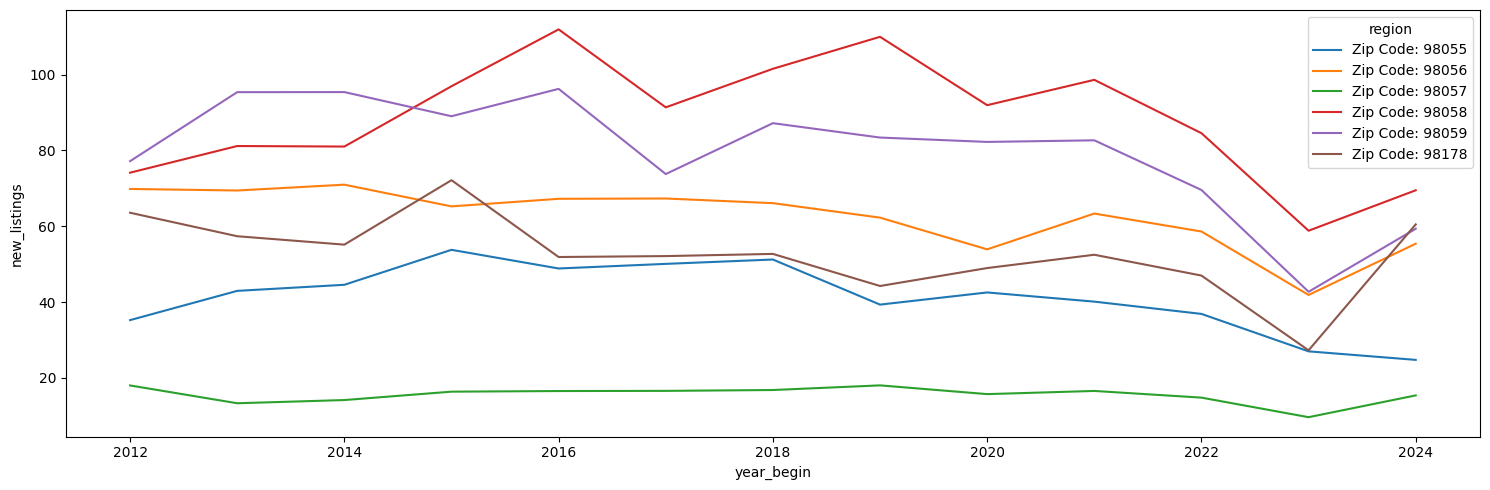

In [17]:
line_chart(renton_,'year_begin','new_listings','region')

* The zip code has highest new listing: 98058
* The zip code has lowest new listing: 98057

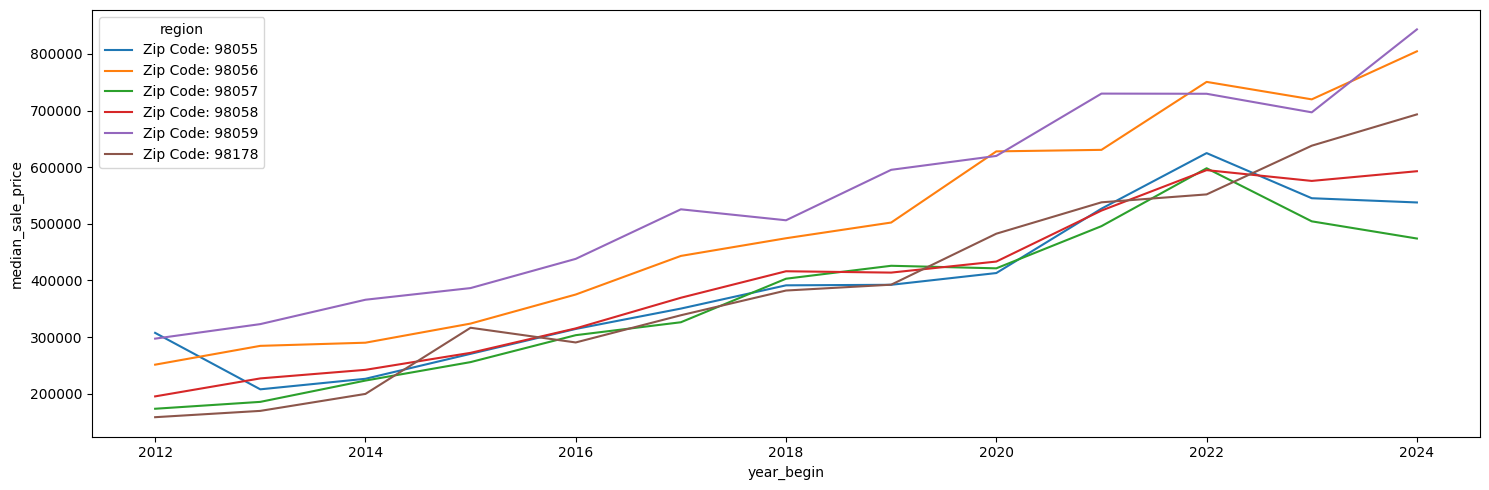

In [18]:
line_chart(renton_,'year_begin','median_sale_price','region')

* Median sale price increase yoy  
* Highest increase from zip code 98059
* Median sale price in zip code 98057 and 98055 increase yoy, but decline from 2022 to 2024
* Median sale price in 98058 increase yoy, but slighly decrease and flatten from 2022 to 2024

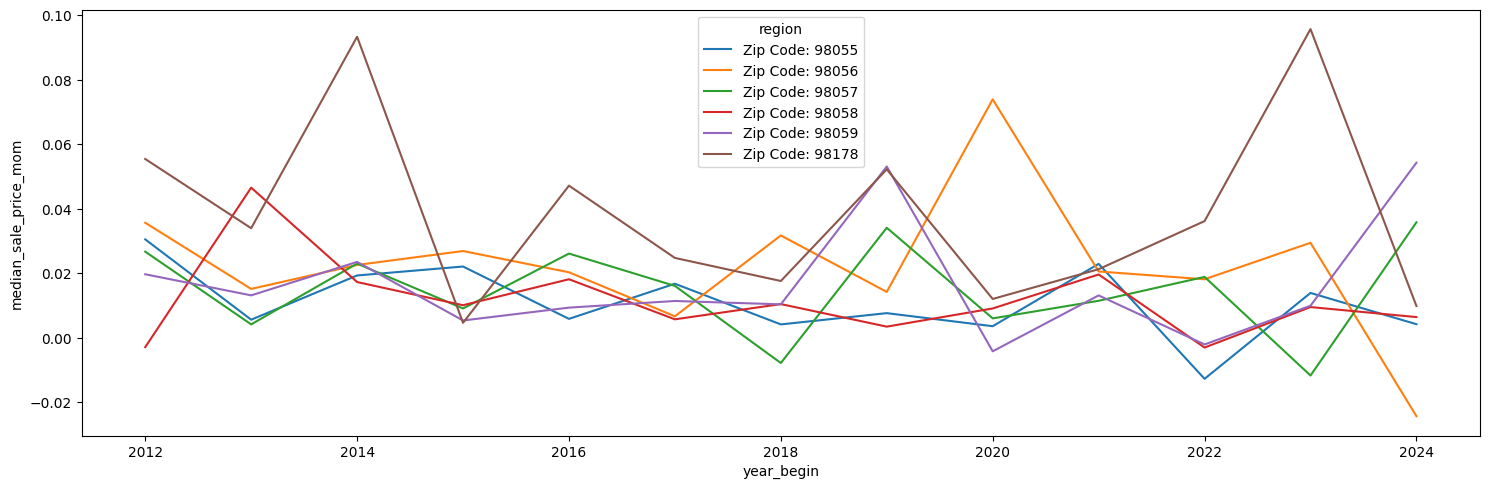

In [19]:
line_chart(renton_,'year_begin','median_sale_price_mom','region')

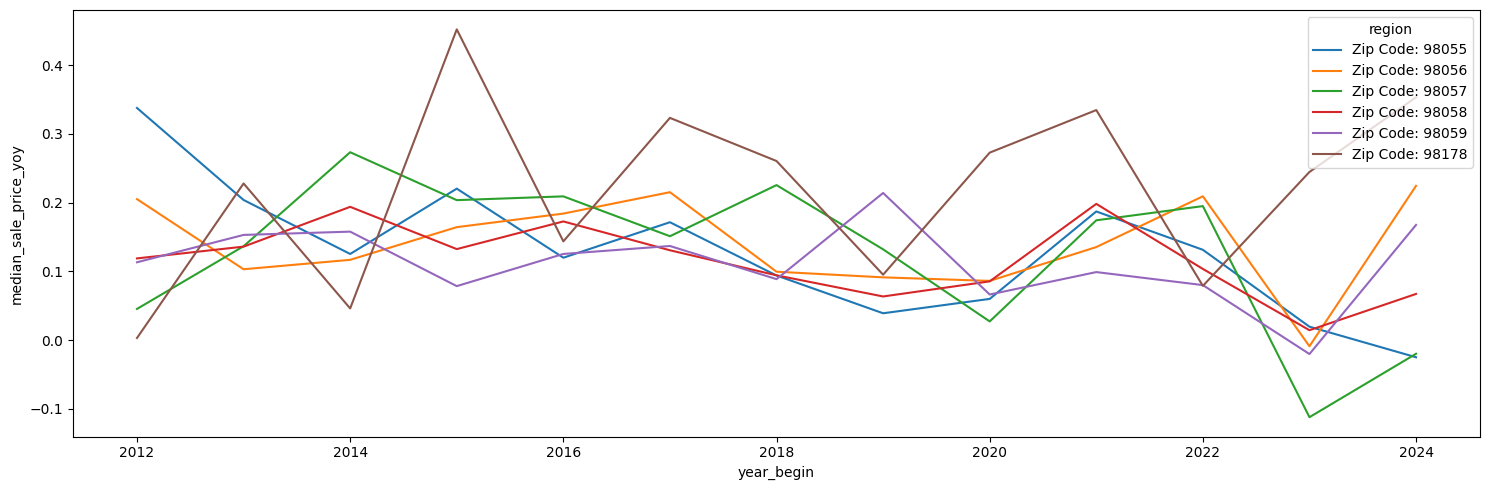

In [20]:
line_chart(renton_,'year_begin','median_sale_price_yoy','region')

In [21]:
def barchart(data,x,y,hue):
    group = data[[x,y,hue]].groupby([hue,x]).mean()
    group_unstacked = group.unstack(hue).round(2)
    group_unstacked.plot(kind='bar', figsize=(10, 6), color=['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2'])
    plt.ylabel(y)
    plt.xticks(rotation=0)
    plt.show()
    return group_unstacked


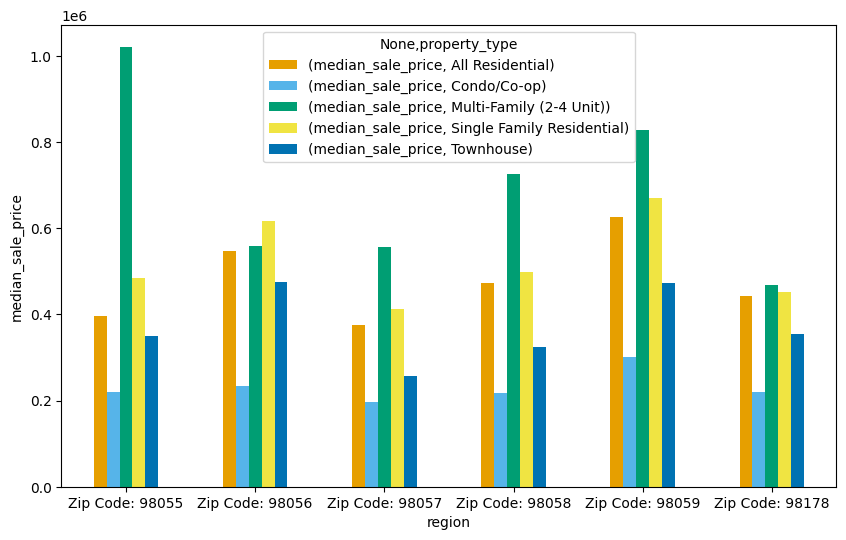

median_sale_price                                      \
property_type     All Residential Condo/Co-op Multi-Family (2-4 Unit)   
region                                                                  
Zip Code: 98055         397100.42   220304.03              1020778.41   
Zip Code: 98056         546970.56   233557.05               558460.24   
Zip Code: 98057         374259.17   197062.84               556255.27   
Zip Code: 98058         472168.84   216771.08               725218.75   
Zip Code: 98059         625315.82   301783.73               827435.71   
Zip Code: 98178         442637.82   219936.11               467498.90   

                                                      
property_type   Single Family Residential  Townhouse  
region                                                
Zip Code: 98055                 485329.40  349081.04  
Zip Code: 98056                 617196.12  475879.97  
Zip Code: 98057                 412113.26  256882.38  
Zip Code: 98058                 498895.17  324782.45  
Zip Code: 98059                 670572.54  472254.41  
Zip Code: 98178                 451632.80  354902.95

In [22]:
barchart(renton_,'region','median_sale_price','property_type')

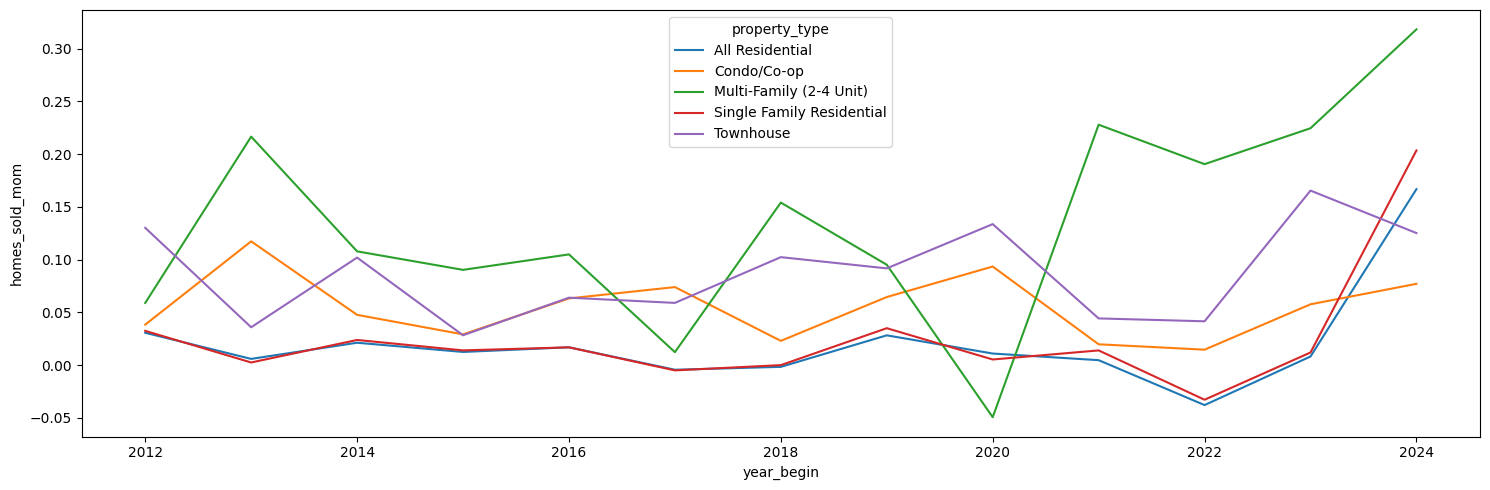

In [23]:

line_chart(renton_,'year_begin','homes_sold_mom','property_type')

In [24]:
renton_.columns

Index(['period_begin', 'period_end', 'region', 'city', 'property_type',
       'median_sale_price', 'median_sale_price_mom', 'median_sale_price_yoy',
       'median_list_price', 'median_list_price_mom', 'median_list_price_yoy',
       'median_ppsf', 'median_ppsf_mom', 'median_ppsf_yoy', 'median_list_ppsf',
       'median_list_ppsf_mom', 'median_list_ppsf_yoy', 'homes_sold',
       'homes_sold_mom', 'homes_sold_yoy', 'pending_sales',
       'pending_sales_mom', 'pending_sales_yoy', 'new_listings',
       'new_listings_mom', 'new_listings_yoy', 'inventory', 'inventory_mom',
       'inventory_yoy', 'median_dom', 'median_dom_mom', 'median_dom_yoy',
       'avg_sale_to_list', 'avg_sale_to_list_mom', 'avg_sale_to_list_yoy',
       'sold_above_list', 'sold_above_list_mom', 'sold_above_list_yoy',
       'off_market_in_two_weeks', 'off_market_in_two_weeks_mom',
       'off_market_in_two_weeks_yoy', 'year_begin', 'year_end'],
      dtype='object')

In [25]:
zipcode98059 = renton_.loc[renton_['region']=='Zip Code: 98059']
zipcode98058 = renton_.loc[renton_['region']=='Zip Code: 98058']
zipcode98057 = renton_.loc[renton_['region']=='Zip Code: 98057']
zipcode98056 = renton_.loc[renton_['region']=='Zip Code: 98056']
zipcode98055 = renton_.loc[renton_['region']=='Zip Code: 98055']
zipcode98178 = renton_.loc[renton_['region']=='Zip Code: 98178']

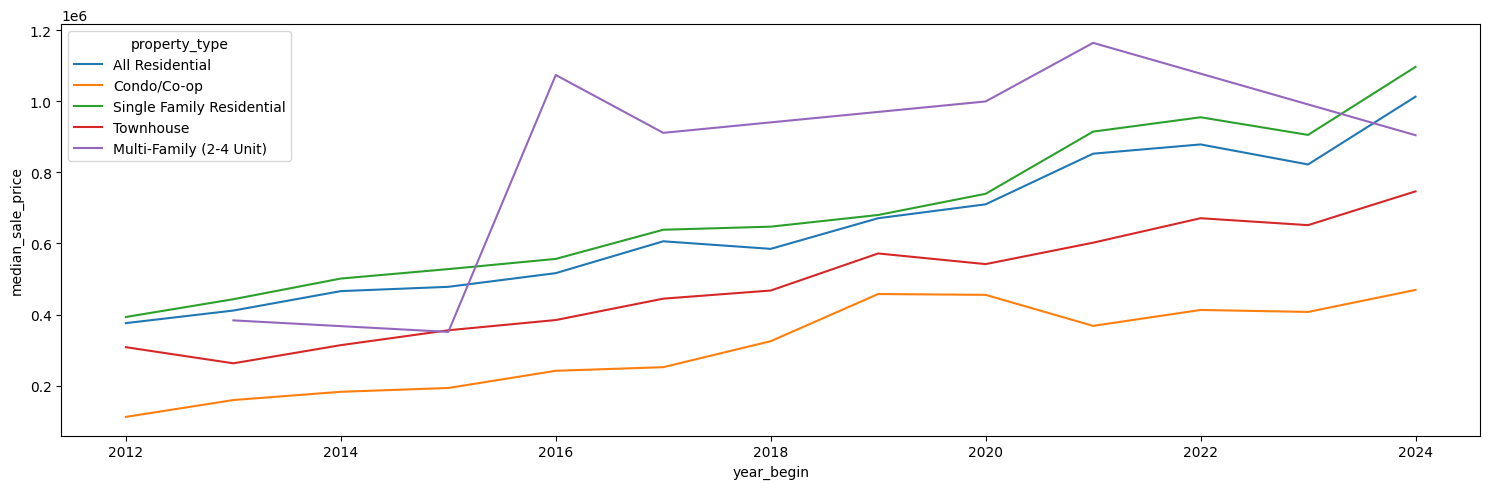

In [26]:
line_chart(zipcode98059,'year_begin','median_sale_price','property_type')

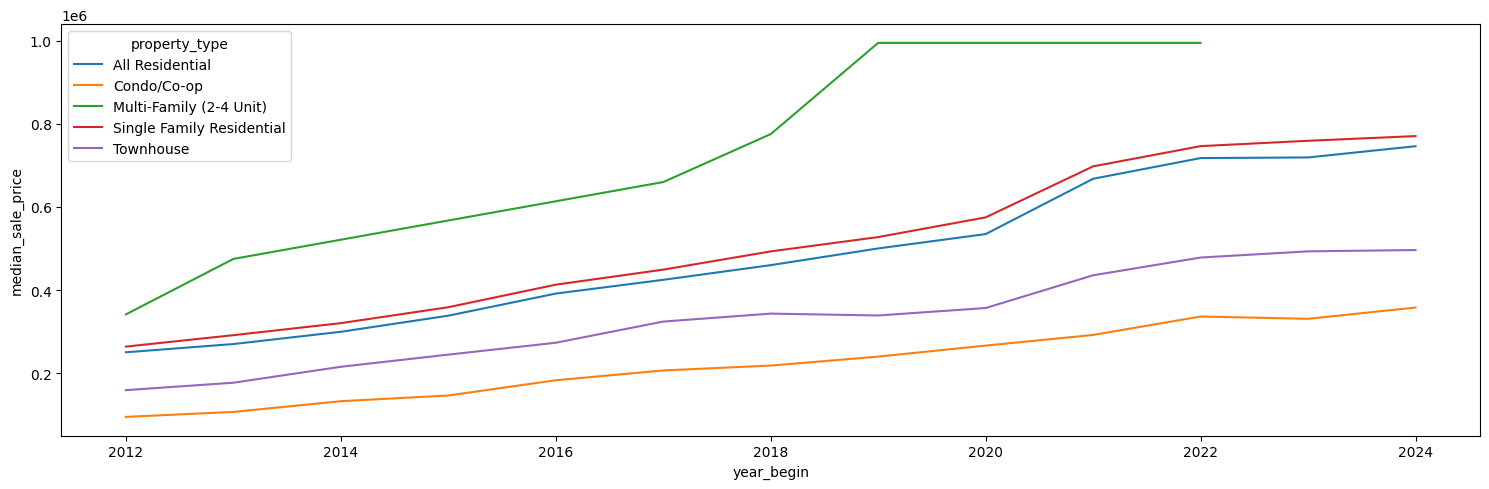

In [27]:
line_chart(zipcode98058,'year_begin','median_sale_price','property_type')

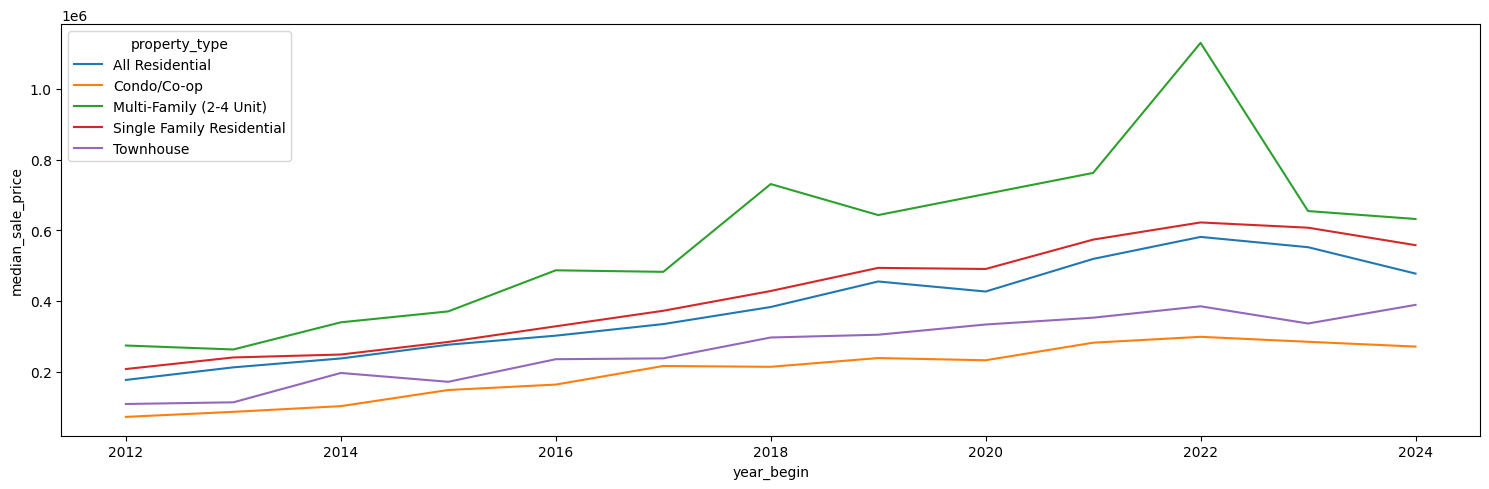

In [28]:
line_chart(zipcode98057,'year_begin','median_sale_price','property_type')

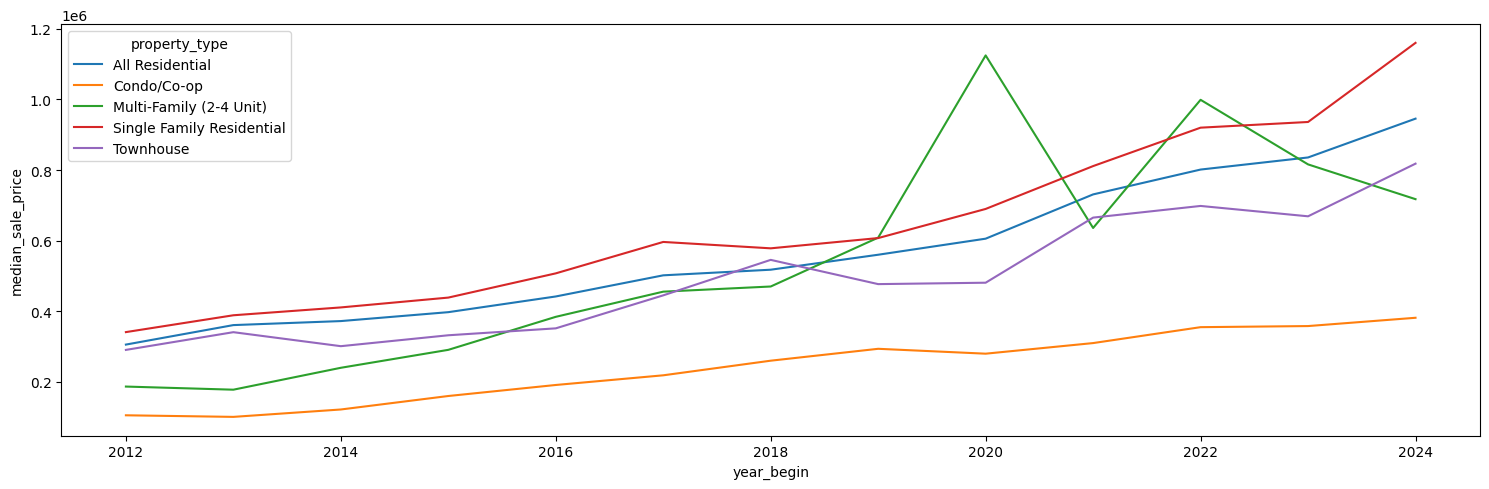

In [29]:
line_chart(zipcode98056,'year_begin','median_sale_price','property_type')

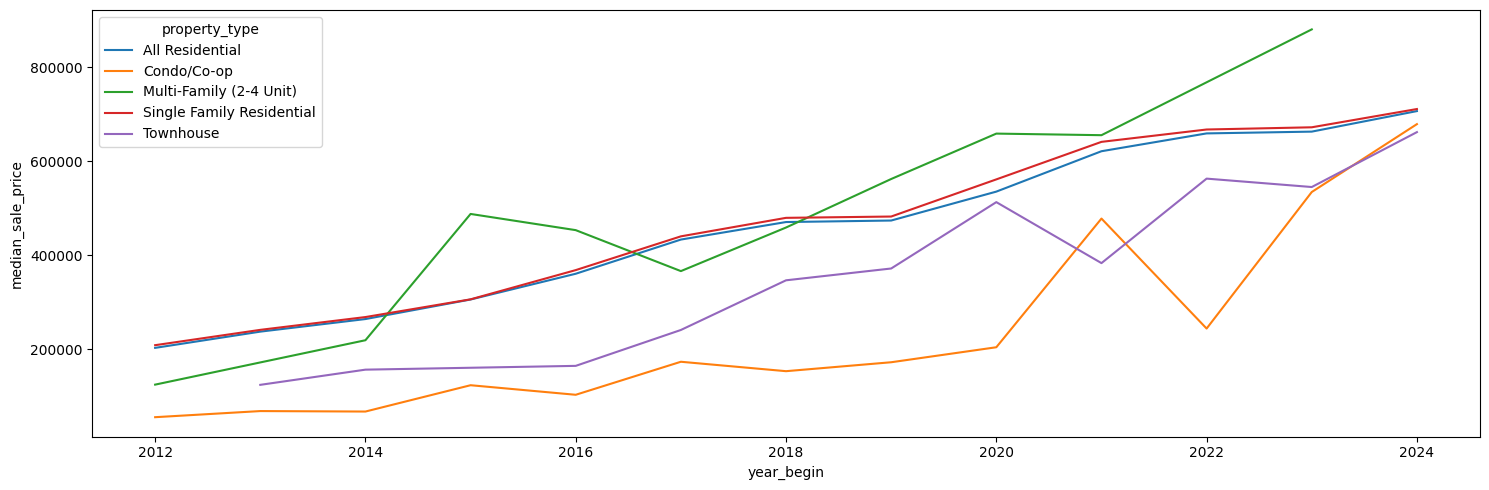

In [30]:
line_chart(zipcode98178,'year_begin','median_sale_price','property_type')

## ARIMA model

Source: https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/

In [31]:
test = renton_[['period_begin','property_type','median_sale_price','median_sale_price_mom','median_sale_price_yoy']]
test=test.loc[test['property_type']=='Single Family Residential']
test=test.drop(columns=('property_type'))
test.head()


,period_begin,median_sale_price,median_sale_price_mom,median_sale_price_yoy
216,2012-01-01,190000.0,0.187500,0.061453
459,2012-01-01,235000.0,0.000000,-0.059812
479,2012-01-01,286000.0,0.067164,-0.084800
504,2012-01-01,206000.0,-0.123404,-0.141577
606,2012-01-01,376950.0,-0.013220,0.048248


In [32]:
test = test.groupby('period_begin').mean().round(2)

In [33]:
test.head()

,median_sale_price,median_sale_price_mom,median_sale_price_yoy
period_begin,,,
2012-01-01,248041.67,0.00,-0.04
2012-02-01,267253.25,0.09,0.04
2012-03-01,263066.67,-0.02,0.05
2012-04-01,268736.58,0.02,0.02
2012-05-01,274335.50,0.02,0.02


<Axes: xlabel='period_begin'>

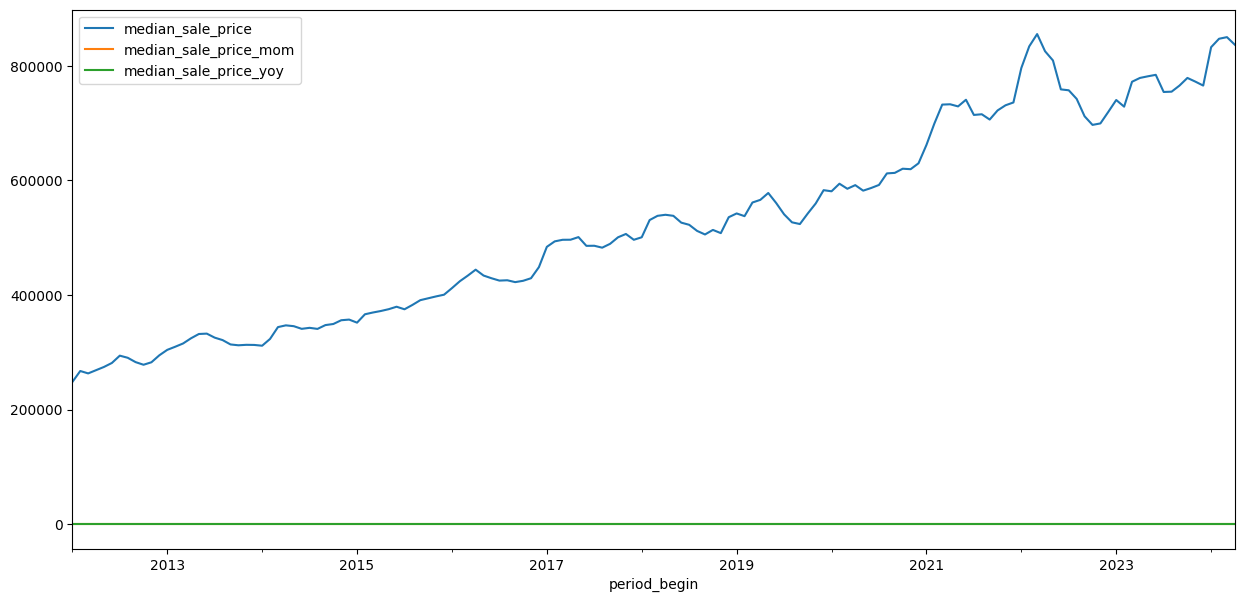

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
test.plot()

### Using Adfuller

In [35]:
from statsmodels.tsa.stattools import adfuller

In [36]:
test_result=adfuller(test['median_sale_price'])


To identify the nature of data, we will be using the null hypothesis.  

H0: The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.  

H1: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0.  

Ho: It is non-stationary  
H1: It is stationary

In [37]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
        else:
            print("weak evidence against null hypothesis,indicating it is non-stationary ")


In [38]:
adfuller_test(test['median_sale_price'])

ADF Test Statistic : 0.2282857564451827
weak evidence against null hypothesis,indicating it is non-stationary 
p-value : 0.9738041730290665
weak evidence against null hypothesis,indicating it is non-stationary 
#Lags Used : 7
weak evidence against null hypothesis,indicating it is non-stationary 
Number of Observations : 140
weak evidence against null hypothesis,indicating it is non-stationary 


In [39]:
adfuller_test(test['median_sale_price_mom'])

ADF Test Statistic : -7.297071677576703
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
p-value : 1.3690909183122648e-10
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
#Lags Used : 7
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
Number of Observations : 140
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<Axes: xlabel='period_begin'>

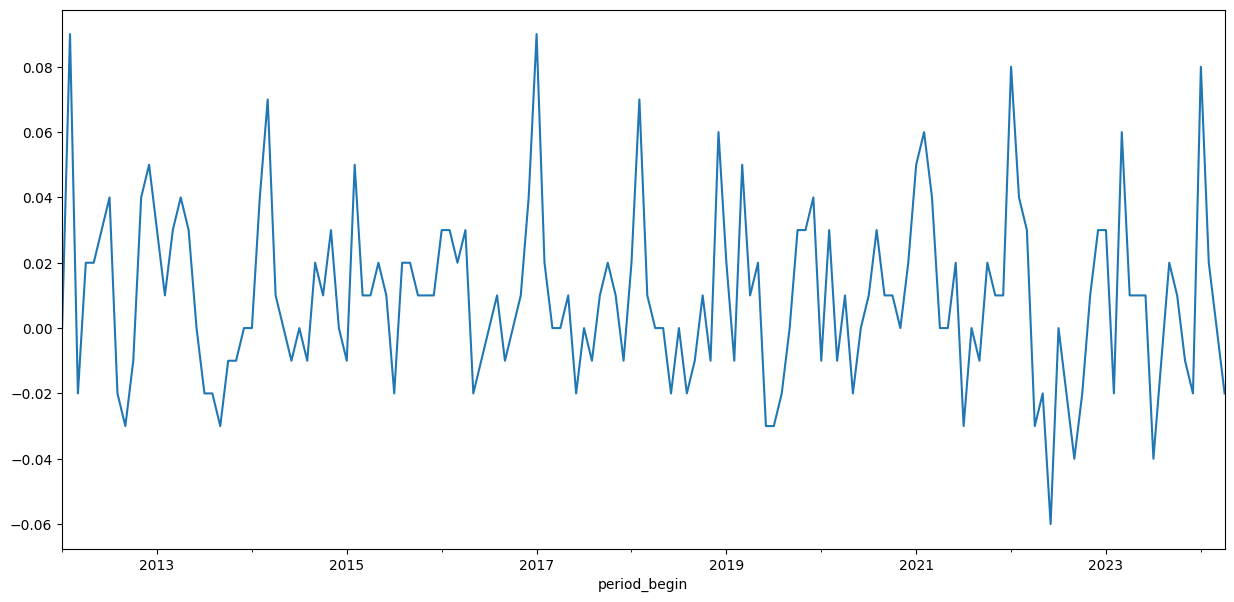

In [40]:
test['median_sale_price_mom'].plot()

### Create auto-correlation

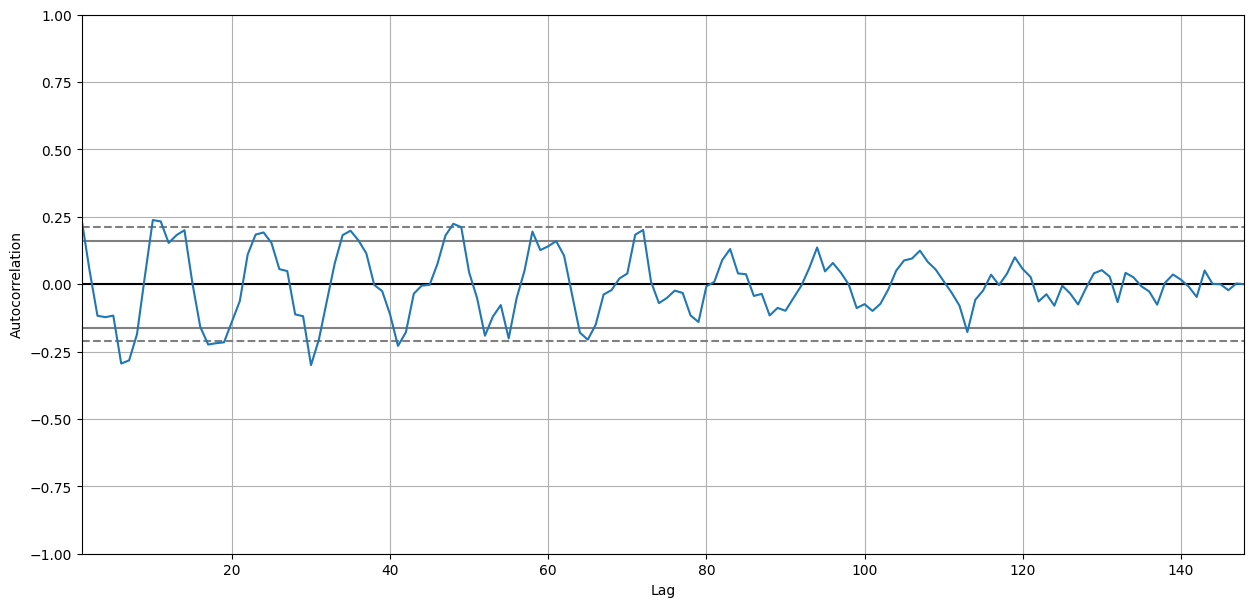

In [41]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(test['median_sale_price_mom'])
plt.show()

* Pattern and Trends:  
The plot shows fluctuations around the 0 line, with some values above and below the confidence intervals. This indicates some degree of correlation at certain lags, potentially pointing to cyclical or periodic patterns.  
  
* Significant Lags:
The lags where the blue line crosses the dashed lines are considered statistically significant. These indicate periods where the median sale price changes are correlated, either positively or negatively.  

* Overall Observation:  
There appears to be a weak cyclical pattern, as the autocorrelation coefficients oscillate between positive and negative values. The significant lags suggest that past values have some influence on future values at specific intervals.

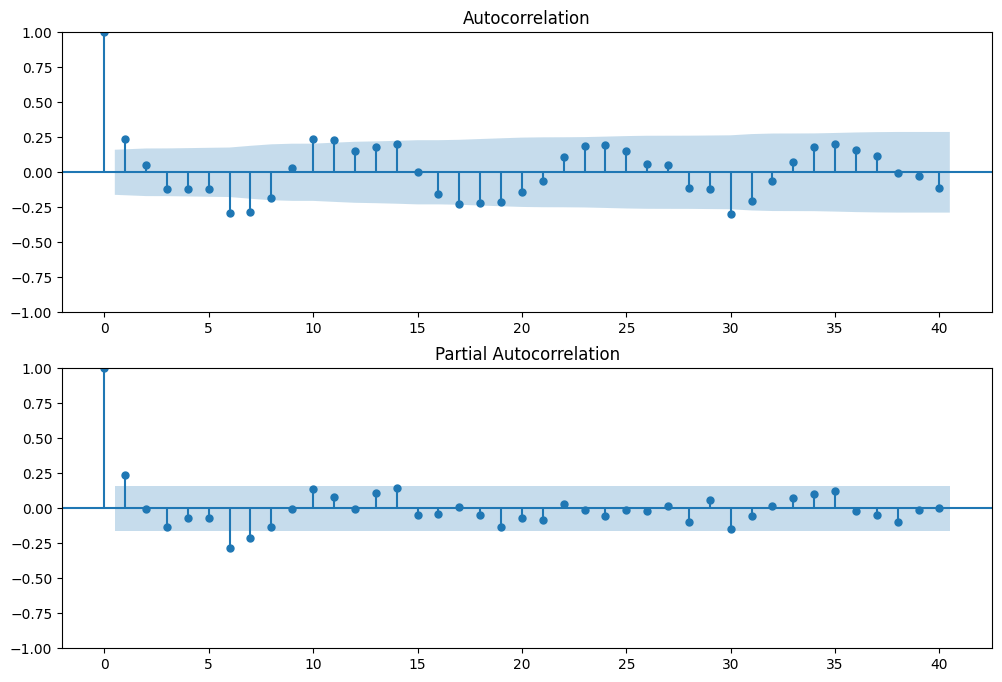

In [42]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(test['median_sale_price_mom'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(test['median_sale_price_mom'].dropna(),lags=40,ax=ax2)

In [43]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'test' is a DataFrame and 'median_sale_price_mom' is the target column
model = ARIMA(test['median_sale_price_mom'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


                                 SARIMAX Results                                 
Dep. Variable:     median_sale_price_mom   No. Observations:                  148
Model:                    ARIMA(1, 1, 1)   Log Likelihood                 327.528
Date:                   Tue, 06 Aug 2024   AIC                           -649.055
Time:                           18:00:55   BIC                           -640.084
Sample:                       01-01-2012   HQIC                          -645.410
                            - 04-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2488      0.092      2.703      0.007       0.068       0.429
ma.L1         -0.9998      2.151     -0.465      0.642      -5.215       3.216
sigma2         0.0007      0

/Users/duyenle/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/duyenle/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/duyenle/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


* ar.L1: Autoregressive Term at Lag 1  
The coefficient of 0.2488 indicates that if the median sale price increase last month, it is likely to increase by 24.88% this month.    
P-value = 0.007 indicates that this term is statisticallt significant at 5% level. It means that last month return have a meaningful predictive relationship with current month.  

* am.L1: Moving Average Term at Lag 1  
The coefficent of -0.9998 and P-value of 0.642 indicate that if there was a positive error (i.e., the model overestimated the previous month's return), the model almost completely corrects it by underestimating the current month's return, and vice versa. However, the lack of statistical significance (high p-value) suggests that this term may not be very reliable.  

* sigma2: Variance of Residuals  
The coefficient of 0.0007 indicates the estimated variance of the residuals, or the unexplained variance by the model. A lower sigma2 suggests that the model has a good fit with low error variance, implying that the MoM return data is relatively stable and predictable.  

<Axes: xlabel='period_begin'>

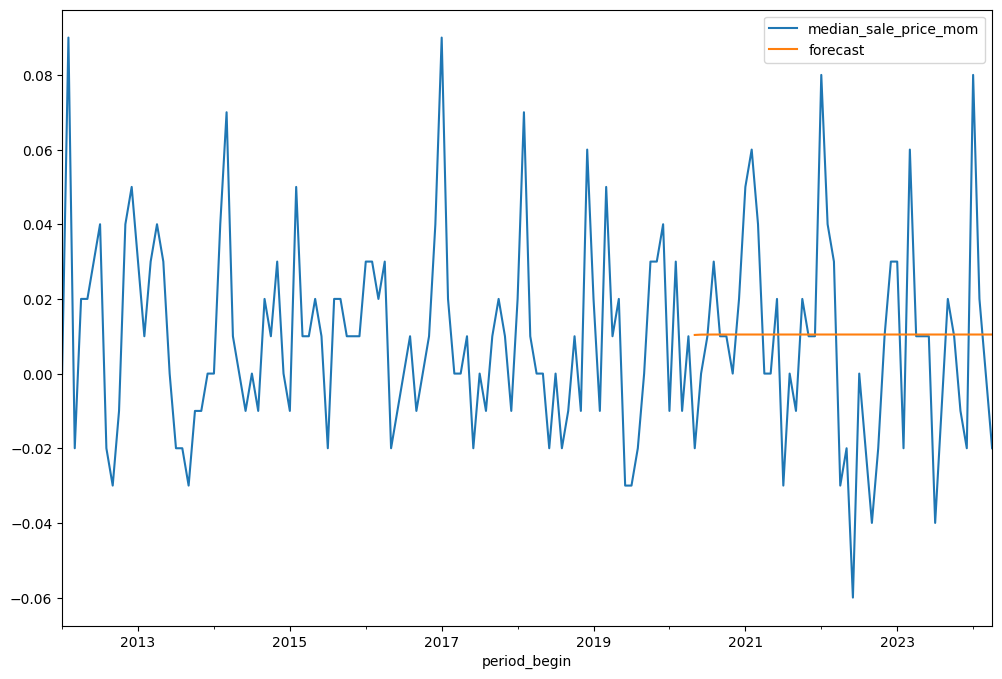

In [44]:
test['forecast']=model_fit.predict(start=100,end=148,dynamic=True)
test[['median_sale_price_mom','forecast']].plot(figsize=(12,8))

/Users/duyenle/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/duyenle/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/duyenle/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.37605D+00    |proj g|=  1.81157D+01

At iterate    5    f= -1.46260D+00    |proj g|=  7.54953D-01

At iterate   10    f= -1.93078D+00    |proj g|=  6.04522D+00

At iterate   15    f= -1.94645D+00    |proj g|=  9.93855D-02

At iterate   20    f= -2.01316D+00    |proj g|=  1.45419D-01

At iterate   25    f= -2.01493D+00    |proj g|=  1.35513D-01

At iterate   30    f= -2.01499D+00    |proj g|=  2.22612D-01

At iterate   35    f= -2.01690D+00    |proj g|=  1.48929D-01

At iterate   40    f= -2.01712D+00    |proj g|=  4.01212D-02

At iterate   45    f= -2.01865D+00    |proj g|=  2.26528D-02

At iterate   50    f= -2.02182D+00    |proj g|=  3.91418D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/duyenle/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='period_begin'>

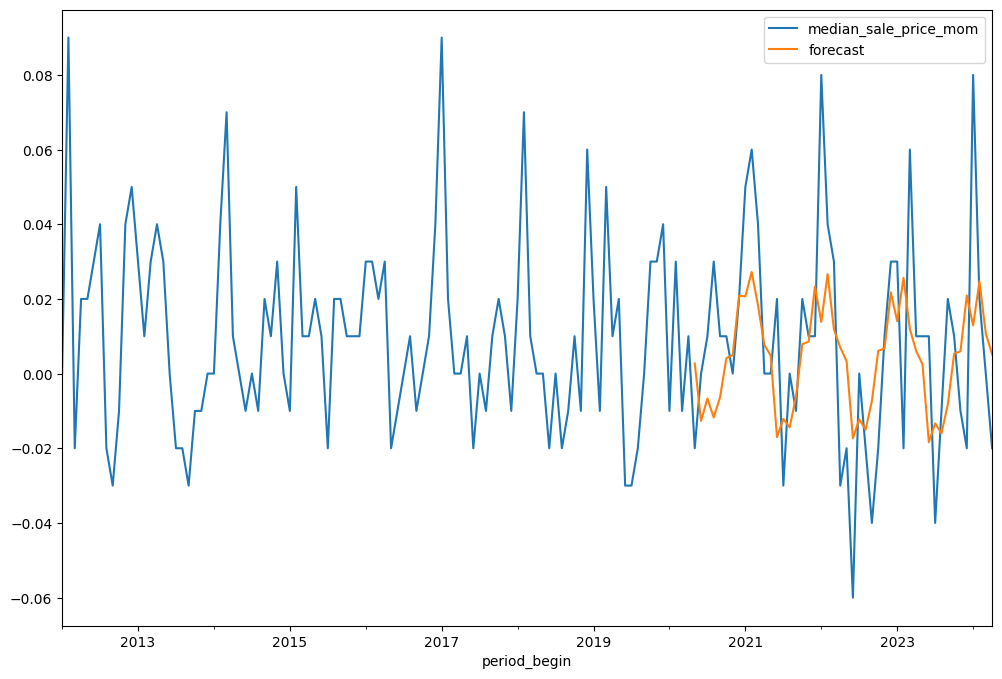

In [45]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(test['median_sale_price_mom'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
test['forecast']=results.predict(start=100,end=148,dynamic=True)
test[['median_sale_price_mom','forecast']].plot(figsize=(12,8))

/var/folders/78/pdprqpw91z18xvt6zrk553800000gn/T/ipykernel_15467/3916083713.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([test,future_datest_df])


<Axes: >

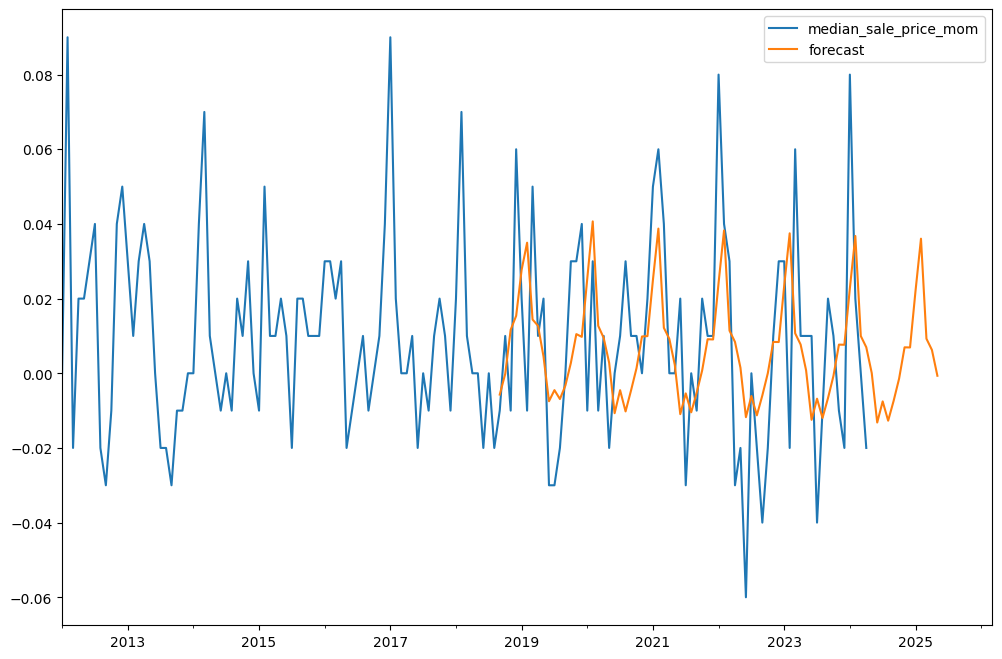

In [46]:
from pandas.tseries.offsets import DateOffset
future_dates=[test.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=test.columns)

future_datest_df.tail()

future_df=pd.concat([test,future_datest_df])

future_df['forecast'] = results.predict(start = 80, end = 160, dynamic= True)
future_df[['median_sale_price_mom', 'forecast']].plot(figsize=(12, 8))


In [47]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook

output_notebook()

p = figure(width=800, height=400, x_axis_type='datetime')
p.line(future_df.index, future_df['median_sale_price_mom'], legend_label='Median Sale Price MOM')
p.line(future_df.index, future_df['forecast'], legend_label='Forecast', color='red')

hover = HoverTool()
hover.tooltips = [("Date", "@x{%F}"), ("Value", "@y")]
hover.formatters = {'@x': 'datetime'}
p.add_tools(hover)

show(p)


Loading BokehJS ...

In [48]:
check = future_df.iloc[80:148]
check.head()

,median_sale_price,median_sale_price_mom,median_sale_price_yoy,forecast
2018-09-01,505625.00,-0.01,0.05,-0.005707
2018-10-01,513575.00,0.01,0.04,-0.000171
2018-11-01,507954.17,-0.01,0.02,0.011666
2018-12-01,535745.83,0.06,0.08,0.015380
2019-01-01,542333.33,0.02,0.09,0.027709


In [49]:
actual_values = check['median_sale_price_mom']
forecasted_values = check['forecast']

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(actual_values, forecasted_values)
mse = mean_squared_error(actual_values, forecasted_values)
rmse = mse ** 0.5

In [51]:
result = {'MAE': mae.round(4),
          'MSE': mse.round(4),
          'RMSE': rmse.round(4)}

result_df = pd.DataFrame(list(result.items()), columns=['Metric', 'Value'])
result_df

,Metric,Value
0,MAE,0.0200
1,MSE,0.0006
2,RMSE,0.0249


**Interpretation:**  
* MAE: On average, our forecasts are off by about 2% from the actual values. This percentage reflects how much the predictions deviate from reality.  
* The MSE of 0.0006 indicates that the error is relative small when comparing the actual and forecast value.  
* RMSE: The typical error in our forecasts is about 2.49%. This means, on average, our predictions are off by 2.49% from the actual values.